In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_info_columns = 300

# Chained Assignement
pd.set_option('mode.chained_assignment', 'raise')
pd.set_option('mode.chained_assignment',  None)

plt.rcParams['axes.unicode_minus'] = False # minus 설정
plt.rcParams['font.family'] = 'NanumGothic' # 한글폰트 설정
plt.rcParams['figure.figsize'] = (18, 10) # figsize 설정
plt.rcParams["font.size"] = 20  # fontsize 설정
sns.set(font="NanumGothic",     #화면스타일 설정  
        rc={"axes.unicode_minus":False},
        style='whitegrid')
%matplotlib inline

In [ ]:
# validation 오류 해결
!pip install nbformat
!pip install -U nbformat

## 프로젝트 개요

### 배경

개인으로 생활하면서 버리는 생활폐기물 양이 지속적으로 증가하고 있습니다.
  
사회적으로도 기업의 ESG경영의 중요성 증가, 소비자의 필환경 인식 변화, 정부의 탄소중립 지향, 수도권 폐기물 매립지 등 생활폐기물에 대한 관심은 지속적으로 증가하고 있습니다.   

이에 생활폐기물 양과 관련이 있는 요소가 무엇인지, 지역별 생활 폐기물 양의 차이가 있다면 어떤 요소와 관련있는지 살펴보고자 합니다. 

### 목적

전국, 지역별 생활폐기물에 미치는 요인을 살펴보고, 가장 관계가 있는 요인을 찾습니다.

### 진행방향

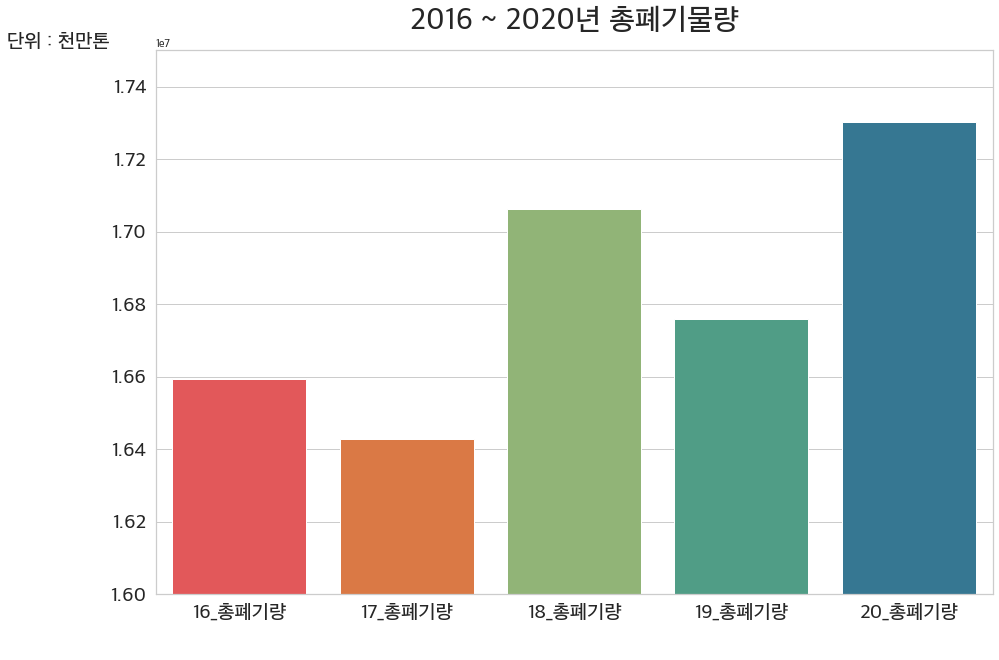{: width="50" height="50"}

최근 5년(2016-2020) 생활폐기물 발생량 중에서 2019,2020년도의 차이를 살펴보는 것으로 정했습니다.  
1. 일간데이터와 연간데이터 비교를 위한 임의적 수치조정이 있었음
2. 변수로 설정한 데이터 수집이 원활했음

### 알고자 하는 것

> 쓰레기가 많은 지역이면 처리하는 업체도 많지 않을까?  
> 1인가구가 많은 지역이면 쓰레기도 더 많을거야

## 변수 설명

|데이터|컬럼명|단위|출처|
|:---:|:---:|:---:|:---:|
|생활폐기물량|종량제, 재활용, 음식물|톤|통계청|
|인구 수|인구|명|통계청|
|가구 수|1인, 2인, 3인이상|개수|통계청|
|주거형태|단독주택, 아파트/연립/다세대, 기타|명|통계청|
|연령|20세미만, 20대, 30대, 40대, 50대, 60대|명|통계청|
|평균 임금|급여액|원|통계청|
|평균 근로시간|근로시간|시간|통계청|
|폐기물 처리업체 수|업체수|개수|자원순환정보시스템|
|소비자 물가지수|CPI|지수|통계청|
|상권|상권수|개수|소상공인진흥공단|
|주요관광지방문객 수|입장객수|개수|통계청|

### 변수 전처리

In [ ]:
df = pd.read_excel('./Downloads/전국/2019/02_01_2019_생활계폐기물(생활(가정), 사업장생활계) 발생 및 처리현황.xlsx', sheet_name = 3,  index_col=[0,1,2,3], header=[1])
df

In [ ]:
# 불러온 데이터에서 필요한 컬럼만 추출
df1 = df.iloc[:,:1]

# 반복문을 통해 데이터만 추출
c_list = ['전국','서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']
df_2019 = []
for item in c_list:
        df2 = pd.concat([df1.loc[(f'{item}','종량제방식 등 혼합배출','소계')],
                        df1.loc[(f'{item}','재활용 \n가능자원\n 분리배출','소계')],
                        df1.loc[(f'{item}','음식물류 폐기물 분리배출')]])
        df3 = df2.transpose().values
        df4 = df3.tolist()
        df_2019.append(df4)
df_2019

#이중리스트 해제
import itertools
aa = list(itertools.chain(*df_2019))
df_2019 = pd.DataFrame(aa)

#인덱스 설정
df_2019.columns=['종량제','재활용','음식물']
df_2019.index = c_list

In [ ]:
df_2019_1 = df_2019.reset_index()
df_2019 = df_2019_1.rename(columns={'index' : '지역'})
df_2019 = df_2019.set_index('지역')
df_2019

이후 수집한 변수 데이터에서 필요한 컬럼만 추출하여 분석데이터 구축

- 가구 수 : 3인 이상 가구를 '3인 이상'으로 합계
- 주거형태: 단독주택과 공동주택(아파트/연립/다세대)로 구분
- 연령: 10세 기준으로 세대 구분

## 분석데이터

### 분석데이터 살펴보기

생활폐기물량 데이터를 기준으로 컬럼을 정제한 변수데이터를 합쳐 분석데이터를 구축했습니다.

|데이터프레임명|설명|
|:---:|:---:|
|data_2019|2019년, 지역별, 분류별 생활폐기물량과 변수데이터 |
|data_2020|2020년, 지역별, 분류별 생활폐기물량과 변수데이터 |
|data_total|연도별, 전국 단위, 총 생활폐기물량과 변수데이터|

In [3]:
# 분석데이터 불러오기
data_2019 = pd.read_csv('./data_2019.csv', index_col=0)
data_2020 = pd.read_csv('./data_2020.csv', index_col=0)
data_total = pd.read_csv('./data_total.csv', index_col=0)

In [4]:
#2019년 데이터 살펴보기
data_2019

,지역,종량제,재활용,음식물,인구_19,1인,2인,3인 이상,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,주택이외,20세 미만,20대,30대,40대,50대,60세 이상,업체수_19,근로시간,급여액,입장객수_19,1인당종량제,1인당재활용,1인당음식물,총폐기물량
0,서울,1173329.0,1045761.5,941079.5,9639541,1299787,1005065,1591537,315566,1720691,110968,777205,29534,224878,1482264,1456623,1509959,1560983,1539968,2179310,19,177.5,3704202.0,28172637.0,0.121720,0.108487,0.097627,3160170.0
1,부산,315980.5,514102.5,247032.0,3372692,423227,400961,552842,202101,831294,31073,171485,13804,69265,526561,436149,435710,517782,583099,914540,29,181.0,3050186.0,28172637.0,0.093688,0.152431,0.073245,1077115.0
2,대구,434861.0,269224.0,233198.5,2429940,284416,267961,416243,147565,579777,9438,52880,10680,20910,425510,323641,305986,393387,428249,561258,8,184.7,2908433.0,14235894.0,0.178960,0.110795,0.095969,937283.5
3,인천,338099.5,116216.0,244221.5,2952237,297865,305688,517023,97302,648403,26309,238301,9050,78151,525651,407608,421189,489961,516594,596023,44,183.0,3121843.0,7586854.0,0.114523,0.039365,0.082724,698537.0
4,광주,209181.5,42997.0,171294.5,1489730,182364,156984,247811,82695,419567,9383,8649,5867,14214,290950,207448,192943,244566,233280,287281,10,179.3,2942622.0,6268660.0,0.140416,0.028862,0.114984,423473.0
5,대전,217102.0,85994.0,166549.5,1498839,205165,158832,245046,80106,362190,10470,34727,5304,12247,275008,212629,200480,242481,243869,300403,8,175.9,3287005.0,7989193.0,0.144847,0.057374,0.111119,469645.5
6,울산,209546.5,140379.0,112712.0,1143692,116015,119926,201153,66107,286234,7900,24809,6546,11446,221104,149137,159743,190771,211359,215905,5,184.3,3377777.0,5394235.0,0.183219,0.122742,0.098551,462637.5
7,세종,44019.0,56064.0,18651.5,338136,39078,31236,59350,16168,112722,1113,1547,707,3204,87286,36340,61464,64472,42480,48533,19,NaN,NaN,700649.0,0.130181,0.165803,0.055160,118734.5
8,경기,1691118.0,698318.0,1094087.5,13300900,1290893,1284977,2331790,504227,3021258,128890,665613,34788,260676,2540452,1770695,1925827,2290198,2198828,2513666,117,184.2,3384598.0,77032600.0,0.127143,0.052502,0.082257,3483523.5
9,강원,373723.5,160892.0,146584.0,1520127,208857,200035,225050,236397,346389,20977,12336,11277,16122,253355,181102,170669,228292,270588,437496,60,180.0,3049958.0,41561085.0,0.245850,0.105841,0.096429,681199.5


### 분석데이터 전처리

In [5]:
#17개 지역에 대한 27개의 컬럼을 가지고 있음
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           17 non-null     object 
 1   종량제          17 non-null     float64
 2   재활용          17 non-null     float64
 3   음식물          17 non-null     float64
 4   인구_19        17 non-null     int64  
 5   1인           17 non-null     int64  
 6   2인           17 non-null     int64  
 7   3인 이상        17 non-null     int64  
 8   단독주택         17 non-null     int64  
 9   아파트          17 non-null     int64  
 10  연립주택         17 non-null     int64  
 11  다세대주택        17 non-null     int64  
 12  비거주용 건물내 주택  17 non-null     int64  
 13  주택이외         17 non-null     int64  
 14  20세 미만       17 non-null     int64  
 15  20대          17 non-null     int64  
 16  30대          17 non-null     int64  
 17  40대          17 non-null     int64  
 18  50대          17 non-null     int64  
 19  60세 이상    

In [6]:
# (명)단위인 입장객수 컬럼 데이터타입 변경
data_2019 = data_2019.astype({'입장객수_19':'int'})

In [7]:
# 2019년도 데이터 결측치 확인
data_2019.isnull().sum()

지역             0
종량제            0
재활용            0
음식물            0
인구_19          0
1인             0
2인             0
3인 이상          0
단독주택           0
아파트            0
연립주택           0
다세대주택          0
비거주용 건물내 주택    0
주택이외           0
20세 미만         0
20대            0
30대            0
40대            0
50대            0
60세 이상         0
업체수_19         0
근로시간           1
급여액            1
입장객수_19        0
1인당종량제         0
1인당재활용         0
1인당음식물         0
총폐기물량          0
dtype: int64

In [8]:
# 결측치 데이터 찾기
data_2019.loc[data_2019['근로시간'].isnull()]

,지역,종량제,재활용,음식물,인구_19,1인,2인,3인 이상,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,주택이외,20세 미만,20대,30대,40대,50대,60세 이상,업체수_19,근로시간,급여액,입장객수_19,1인당종량제,1인당재활용,1인당음식물,총폐기물량
7,세종,44019.0,56064.0,18651.5,338136,39078,31236,59350,16168,112722,1113,1547,707,3204,87286,36340,61464,64472,42480,48533,19,NaN,NaN,700649,0.130181,0.165803,0.05516,118734.5


세종특별자치시의 근로시간과 급여액의 경우 2019년도 데이터가 없음  
이유 추청  
근로시간과 급여액 분석 시 

In [9]:
# 2020년 데이터도 동일하게 진행
data_2020 = data_2020.astype({'입장객수_20':'int'})

In [10]:
# 연도별 데이터
data_total = data_total.iloc[:,:-2]

In [ ]:
# 데이터 확인

## EDA 진행

### 전국 분석

#### CPI 소비자물가지수

소비자물가지수가 높아지면 모든 분류의 생활폐기물이 감소할 것이라고 예상

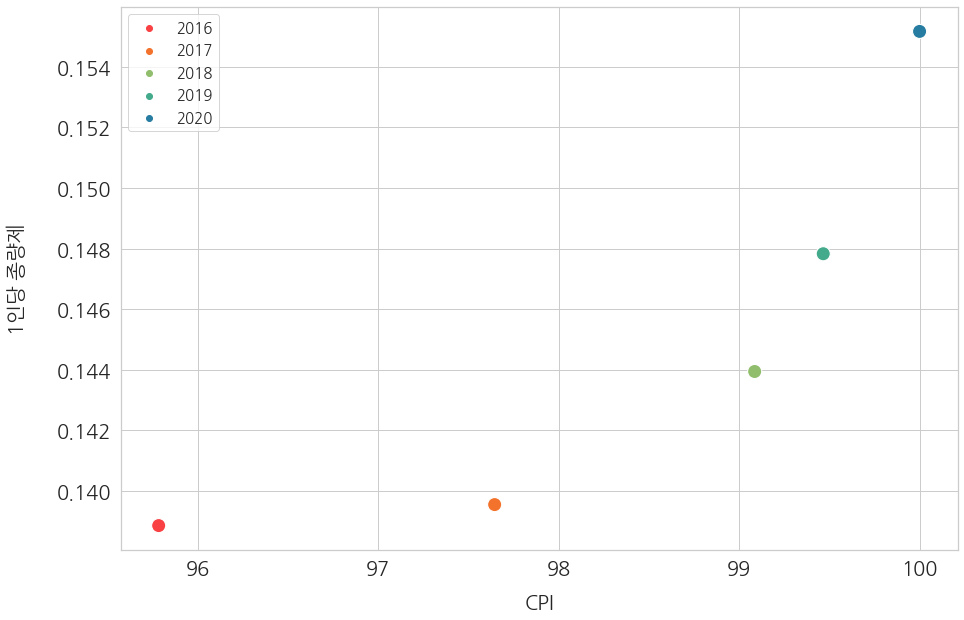

In [11]:
# 1인당 종량제
plt.figure(figsize=(15, 10), facecolor='White')
sns.scatterplot(data=data_total, x='CPI', y='1인당 종량제', hue='년도', s=200, palette=['#F94144','#f3722c','#90BE6D','#43AA8B','#277da1'])
plt.xlabel('CPI', fontsize=20, labelpad=15)
plt.ylabel('1인당 종량제', rotation =90,fontsize=20, labelpad=30)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(loc=2, prop={'size': 15})

plt.show()

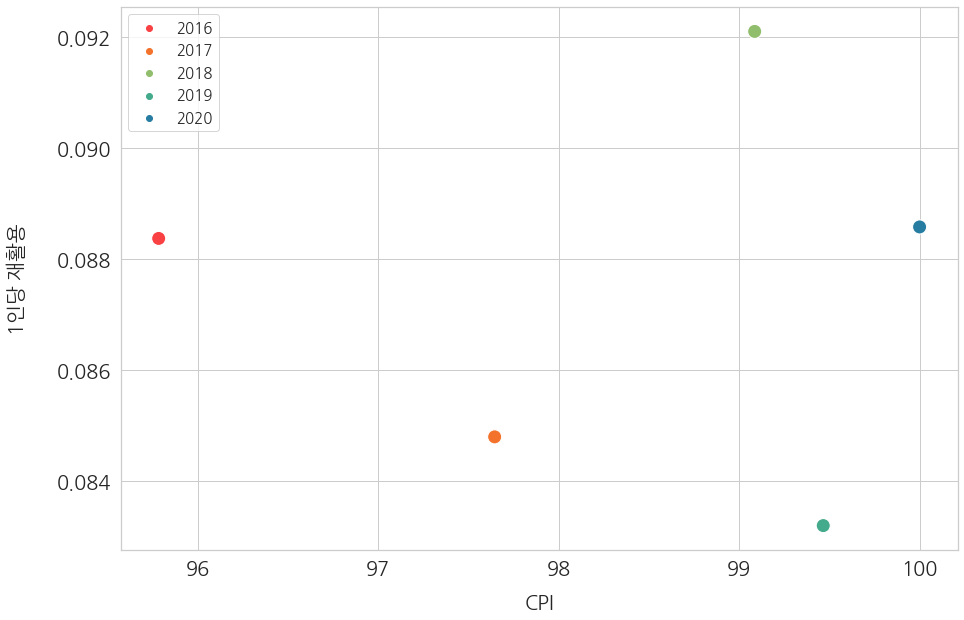

In [12]:
plt.figure(figsize=(15, 10), facecolor='White')
sns.scatterplot(data=data_total, x='CPI', y='1인당 재활용', hue='년도', s=200, palette=['#F94144','#f3722c','#90BE6D','#43AA8B','#277da1'])
plt.xlabel('CPI', fontsize=20, labelpad=15)
plt.ylabel('1인당 재활용', rotation =90,fontsize=20, labelpad=30)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(loc=2, prop={'size': 15})

plt.show()

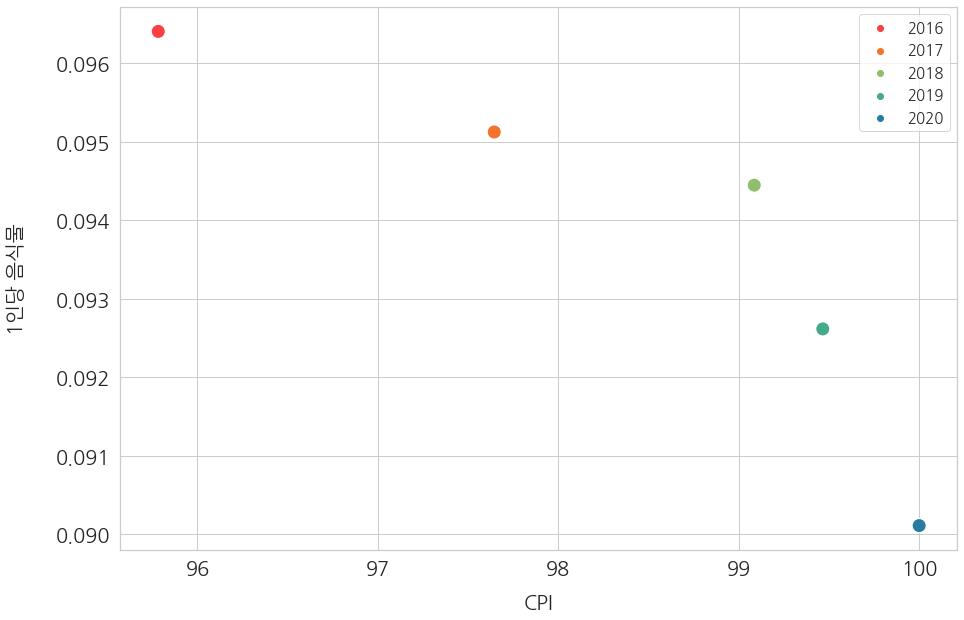

In [13]:
plt.figure(figsize=(15, 10), facecolor='White')
sns.scatterplot(data=data_total, x='CPI', y='1인당 음식물', hue='년도', s=200, palette=['#F94144','#f3722c','#90BE6D','#43AA8B','#277da1'])
plt.xlabel('CPI', fontsize=20, labelpad=15)
plt.ylabel('1인당 음식물', rotation =90,fontsize=20, labelpad=30)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(loc=1, prop={'size': 15})

plt.show()

생활폐기물양은 오히려 증가했고, 음식물은 적어짐. 

1. 종량제 쓰레기 : 소비자 물가지수가 높아질수록 종량제 쓰레기량은 증가한다.
1. 음식물 쓰레기 : 소비자 물가지수가 높아질수록 음식물 쓰레기량은 감소한다.

-> 소비자물가지수보다 다른 변수가 작용! 
-> ~

### 지역별 분석

#### 인구 수

먼저 지역별 총폐기물량을 비교해보면, 수도권의 높은 배출량을 확인할 수 있습니다.

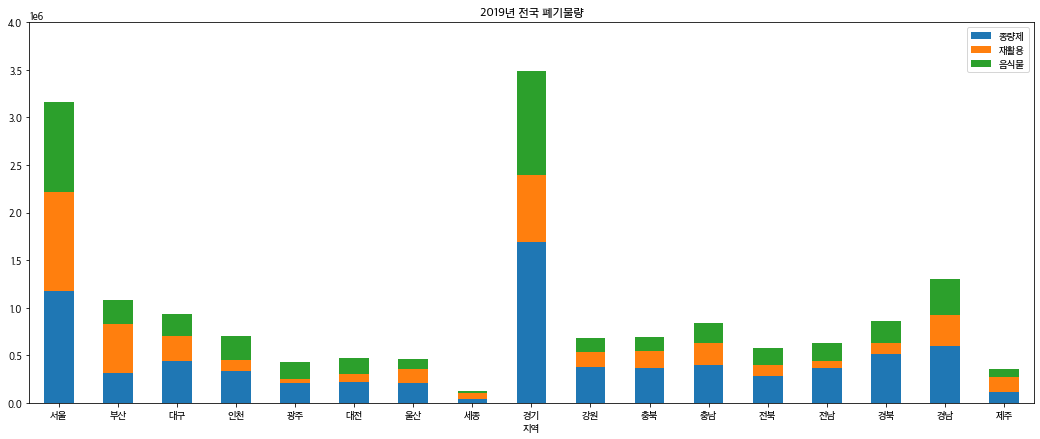

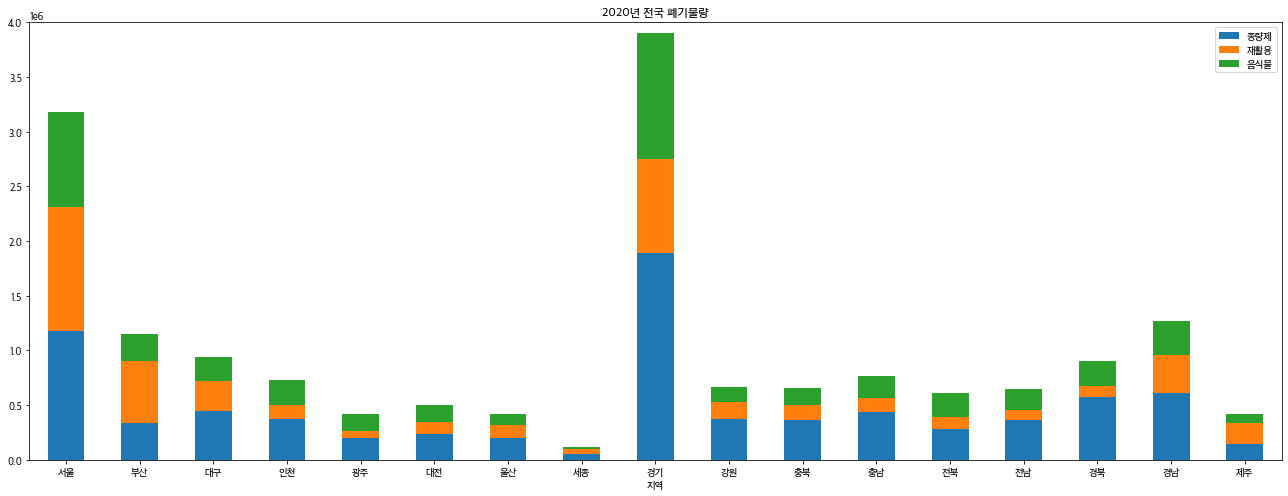

그런데 지역별 인구수를 확인해보면 역시 수도권이 가장 많습니다. 

In [14]:
data_test = data_2019.set_index('지역')
data_test['인구_19'].sort_values(ascending=False)

지역
경기    13300900
서울     9639541
부산     3372692
경남     3347209
인천     2952237
경북     2668154
대구     2429940
충남     2188649
전북     1807423
전남     1787543
충북     1629343
강원     1520127
대전     1498839
광주     1489730
울산     1143692
제주      665048
세종      338136
Name: 인구_19, dtype: int64

그래서 2019년, 2020년의 지역별 폐기물량을 인구로 나눈 '인구당 생활폐기물량'을 사용해 다시 차트를 그려보았습니다.

<Figure size 1080x720 with 0 Axes>

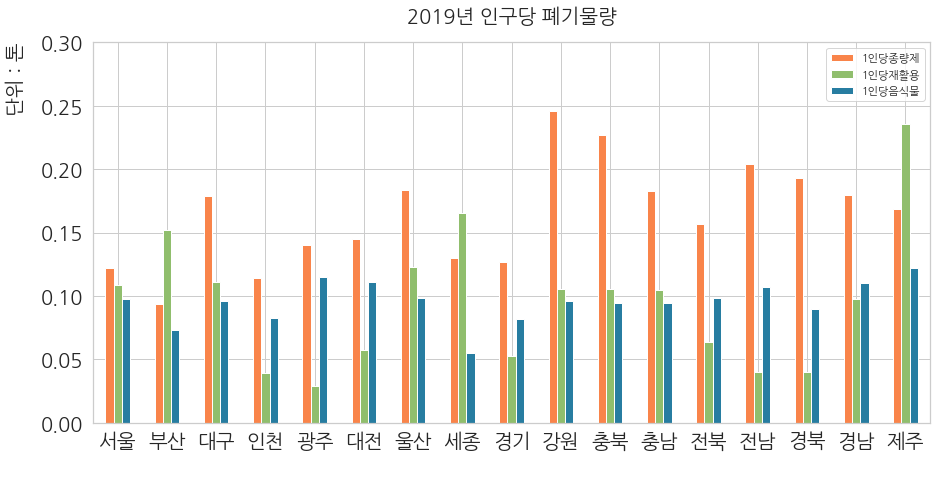

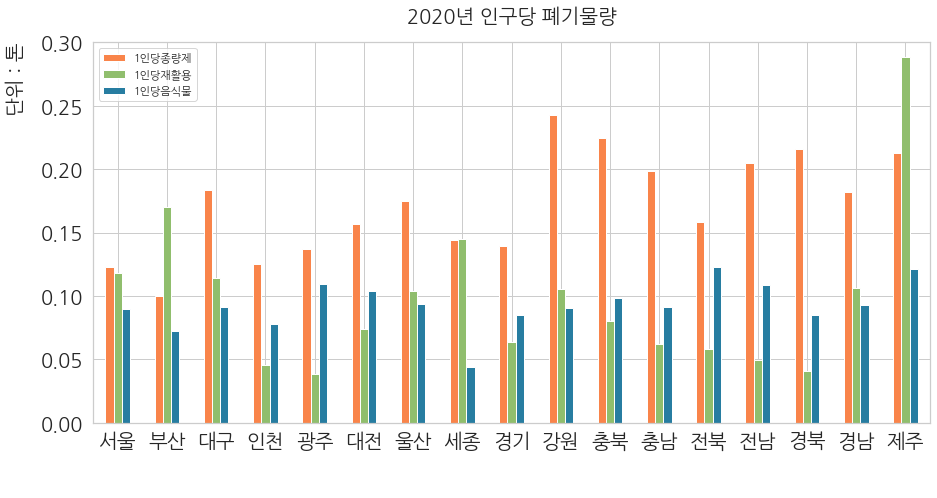

In [15]:
plt.figure(figsize=(15, 10), facecolor='White')

data_2019.iloc[:,[0,24,25,26]].plot.bar(x='지역', figsize=(15,7), color=('#F9844A','#90be6d','#277da1'))
plt.title('2019년 인구당 폐기물량', fontsize=20, pad=20)
plt.ylim([0,0.3])
plt.ylabel('단위 : 톤', loc='top', rotation =90,fontsize=20, labelpad=15)
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)


data_2020.iloc[:,[0,25,26,27]].plot.bar(x='지역', figsize=(15,7), color=('#F9844A','#90be6d','#277da1'))
plt.title('2020년 인구당 폐기물량', fontsize=20, pad=20)
plt.ylim([0,0.3])
plt.ylabel('단위 : 톤', loc='top', rotation =90,fontsize=20, labelpad=15)
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)


plt.show()

인구가 많기 때문에 배출량이 늘어나는 건 당연한가?  
=> 이후 분석에서는 인구당 생활폐기물 배출량 데이터를 사용

#### 가구 수

지역별 가구 수를 먼저 확인합니다.

In [16]:
data_2019[['지역','1인','2인','3인 이상']].head()

,지역,1인,2인,3인 이상
0,서울,1299787,1005065,1591537
1,부산,423227,400961,552842
2,대구,284416,267961,416243
3,인천,297865,305688,517023
4,광주,182364,156984,247811


<Figure size 1080x720 with 0 Axes>

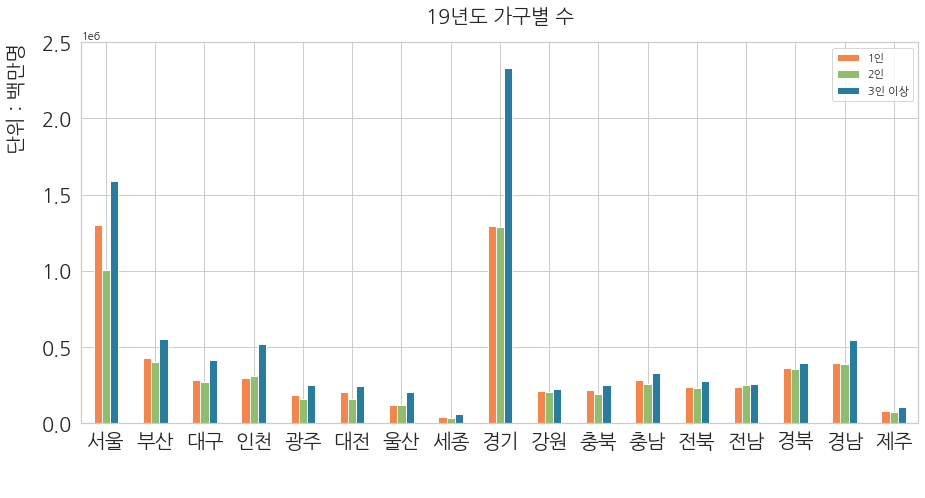

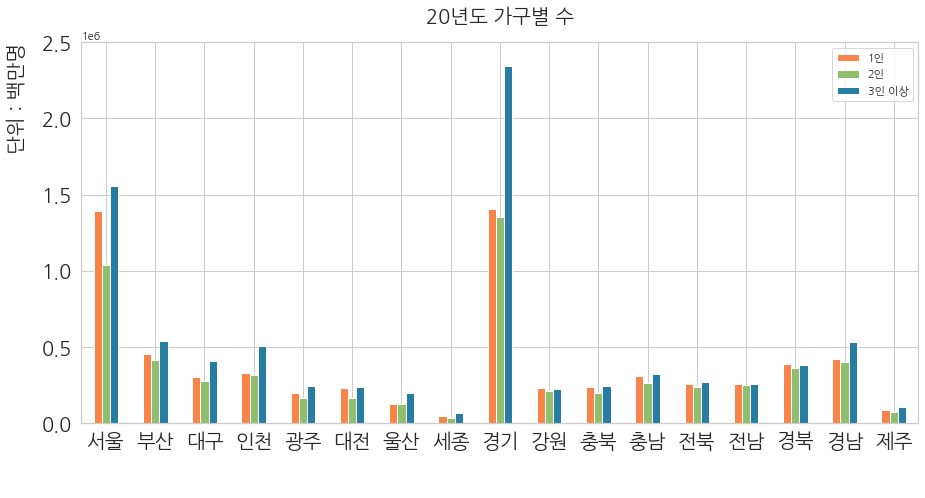

In [17]:
plt.figure(figsize=(15, 10), facecolor='White')

data_2019.iloc[:,[0,5,6,7]].plot.bar(x='지역', figsize=(15,7), color=('#F9844A','#90be6d','#277da1'))
plt.title('19년도 가구별 수', fontsize=20, pad=20)
plt.ylim([0,2500000])
plt.ylabel('단위 : 백만명', loc='top', rotation =90, fontsize=20, labelpad=15)
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)

data_2020.iloc[:,[0,5,6,7]].plot.bar(x='지역', figsize=(15,7), color=('#F9844A','#90be6d','#277da1'))
plt.title('20년도 가구별 수', fontsize=20, pad=20)
plt.ylim([0,2500000])
plt.ylabel('단위 : 백만명', loc='top', rotation =90, fontsize=20, labelpad=15)
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)


plt.show()

인구가 가장 많았던 상위 2개 지역 - 서울/경기가 가구 수도 역시 많습니다.  
그래서 가구 수를 그대로 사용하지 않고, 지역별 구성하는 비율로 계산했습니다.

In [18]:
data_2019['가구합'] = data_2019['1인']+data_2019['2인']+data_2019['3인 이상']
data_2020['가구합'] = data_2020['1인']+data_2020['2인']+data_2020['3인 이상']
data_2019['1인비율'] = data_2019['1인']/data_2019['가구합']
data_2019['2인비율'] = data_2019['2인']/data_2019['가구합']
data_2019['3인이상비율'] = data_2019['3인 이상']/data_2019['가구합']
data_2020['1인비율'] = data_2020['1인']/data_2020['가구합']
data_2020['2인비율'] = data_2020['2인']/data_2020['가구합']
data_2020['3인이상비율'] = data_2020['3인 이상']/data_2020['가구합']
data_2019.head()

,지역,종량제,재활용,음식물,인구_19,1인,2인,3인 이상,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,주택이외,20세 미만,20대,30대,40대,50대,60세 이상,업체수_19,근로시간,급여액,입장객수_19,1인당종량제,1인당재활용,1인당음식물,총폐기물량,가구합,1인비율,2인비율,3인이상비율
0,서울,1173329.0,1045761.5,941079.5,9639541,1299787,1005065,1591537,315566,1720691,110968,777205,29534,224878,1482264,1456623,1509959,1560983,1539968,2179310,19,177.5,3704202.0,28172637,0.121720,0.108487,0.097627,3160170.0,3896389,0.333588,0.257948,0.408465
1,부산,315980.5,514102.5,247032.0,3372692,423227,400961,552842,202101,831294,31073,171485,13804,69265,526561,436149,435710,517782,583099,914540,29,181.0,3050186.0,28172637,0.093688,0.152431,0.073245,1077115.0,1377030,0.307348,0.291178,0.401474
2,대구,434861.0,269224.0,233198.5,2429940,284416,267961,416243,147565,579777,9438,52880,10680,20910,425510,323641,305986,393387,428249,561258,8,184.7,2908433.0,14235894,0.178960,0.110795,0.095969,937283.5,968620,0.293630,0.276642,0.429728
3,인천,338099.5,116216.0,244221.5,2952237,297865,305688,517023,97302,648403,26309,238301,9050,78151,525651,407608,421189,489961,516594,596023,44,183.0,3121843.0,7586854,0.114523,0.039365,0.082724,698537.0,1120576,0.265814,0.272795,0.461390
4,광주,209181.5,42997.0,171294.5,1489730,182364,156984,247811,82695,419567,9383,8649,5867,14214,290950,207448,192943,244566,233280,287281,10,179.3,2942622.0,6268660,0.140416,0.028862,0.114984,423473.0,587159,0.310587,0.267362,0.422051


지역별 가구 수 비율을 확인합니다.

<Figure size 1080x720 with 0 Axes>

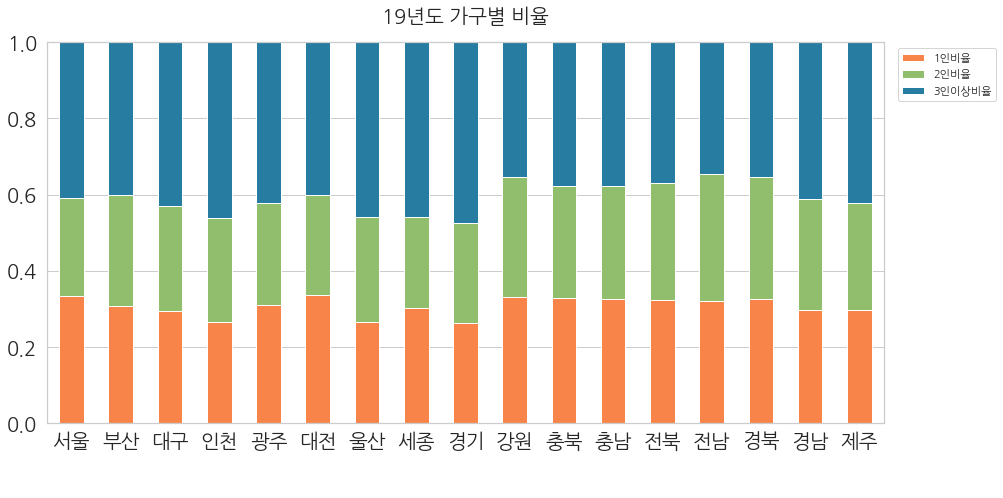

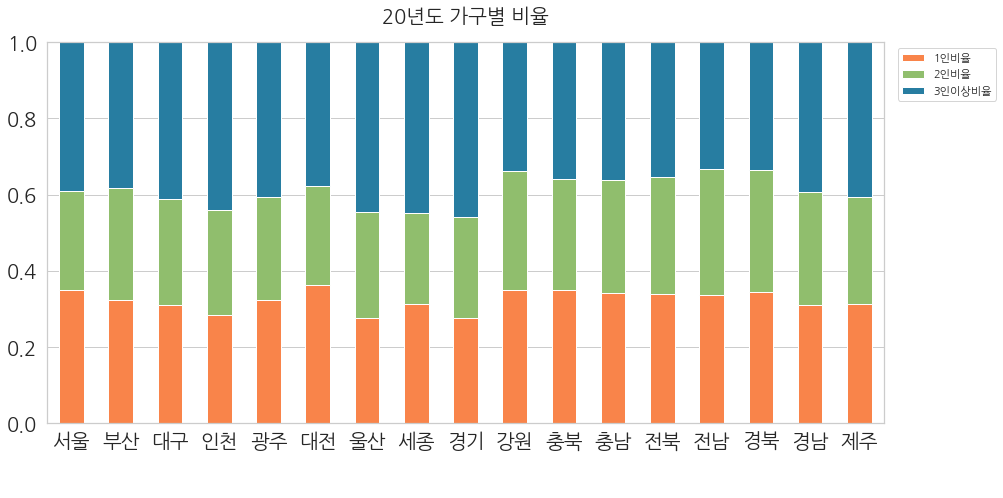

In [19]:
plt.figure(figsize=(15, 10), facecolor='White')


data_2019.iloc[:,[0,29,30,31]].plot.bar(x='지역', figsize=(15,7), stacked=True, color=('#F9844A','#90be6d','#277da1'))
plt.title('19년도 가구별 비율', fontsize=20, pad=20)
plt.ylim([0,1])
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1))


data_2020.iloc[:,[0,30,31,32]].plot.bar(x='지역', figsize=(15,7),stacked=True, color=('#F9844A','#90be6d','#277da1'))
plt.title('20년도 가구별 비율', fontsize=20, pad=20)
plt.ylim([0,1])
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1))



plt.show()

그렇다면 생활폐기물 배출량과 가구수의 비율은 어떤 관계가 있을지 알아보겠습니다.

<Figure size 1296x1080 with 0 Axes>

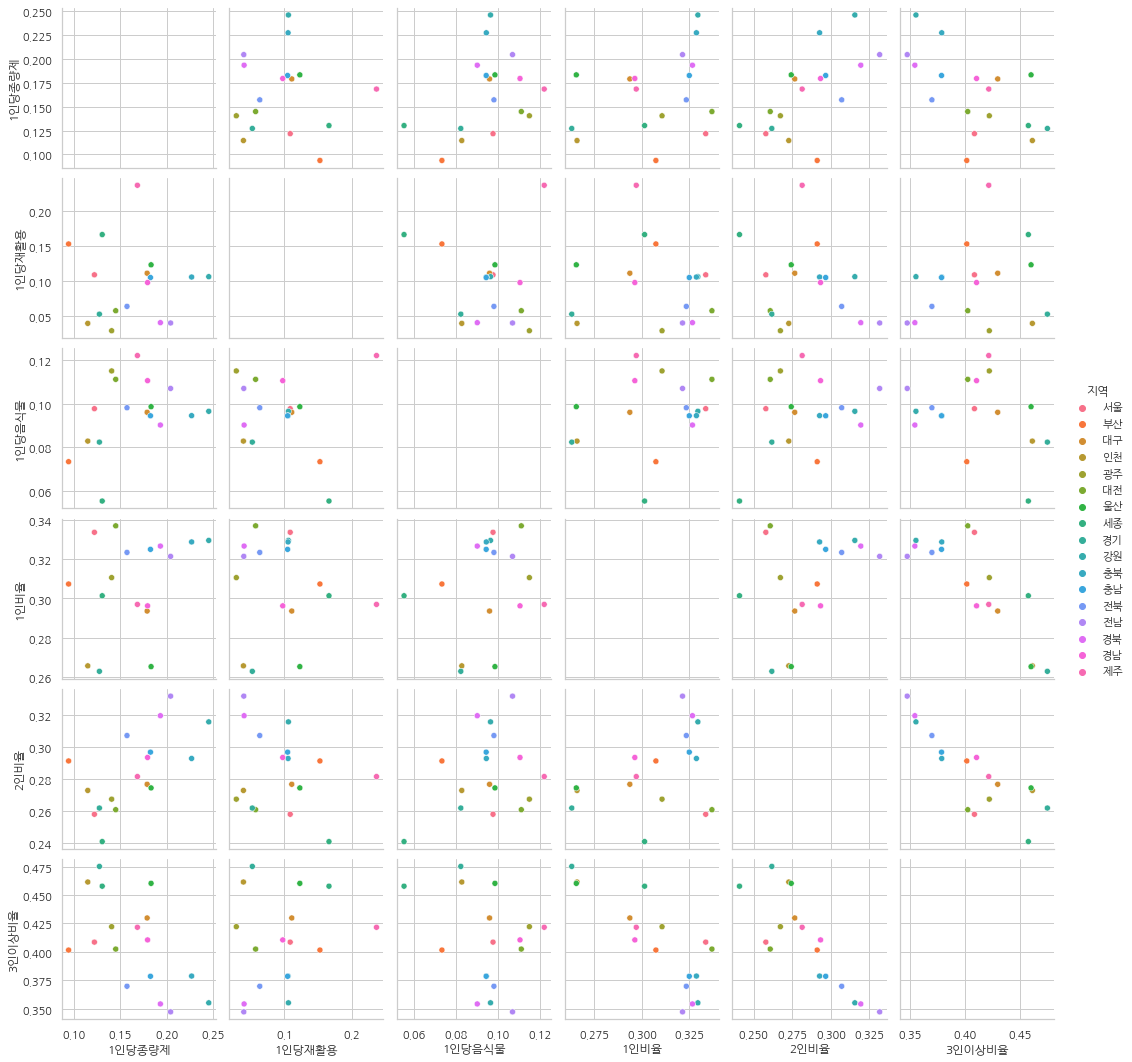

In [20]:
# 2019년도 가구비율 데이터를 pairplot으로 그림
fig = plt.figure(figsize=(18,15), facecolor='white')
sns.pairplot(data_2019.iloc[:,[0,24,25,26,29,30,31]], hue='지역')
plt.show()

In [21]:
data_2019.iloc[:,[0,24,25,26,29,30,31]].corr()

,1인당종량제,1인당재활용,1인당음식물,1인비율,2인비율,3인이상비율
1인당종량제,1.000000,-0.024352,0.364788,0.337184,0.639670,-0.589960
1인당재활용,-0.024352,1.000000,-0.089533,-0.082957,-0.230962,0.189574
1인당음식물,0.364788,-0.089533,1.000000,0.227059,0.273561,-0.302373
1인비율,0.337184,-0.082957,0.227059,1.000000,0.370445,-0.827953
2인비율,0.639670,-0.230962,0.273561,0.370445,1.000000,-0.827610
3인이상비율,-0.589960,0.189574,-0.302373,-0.827953,-0.827610,1.000000


2020년 가구비율과 생활폐기물도 pairplot으로 확인합니다.

<Figure size 1296x1080 with 0 Axes>

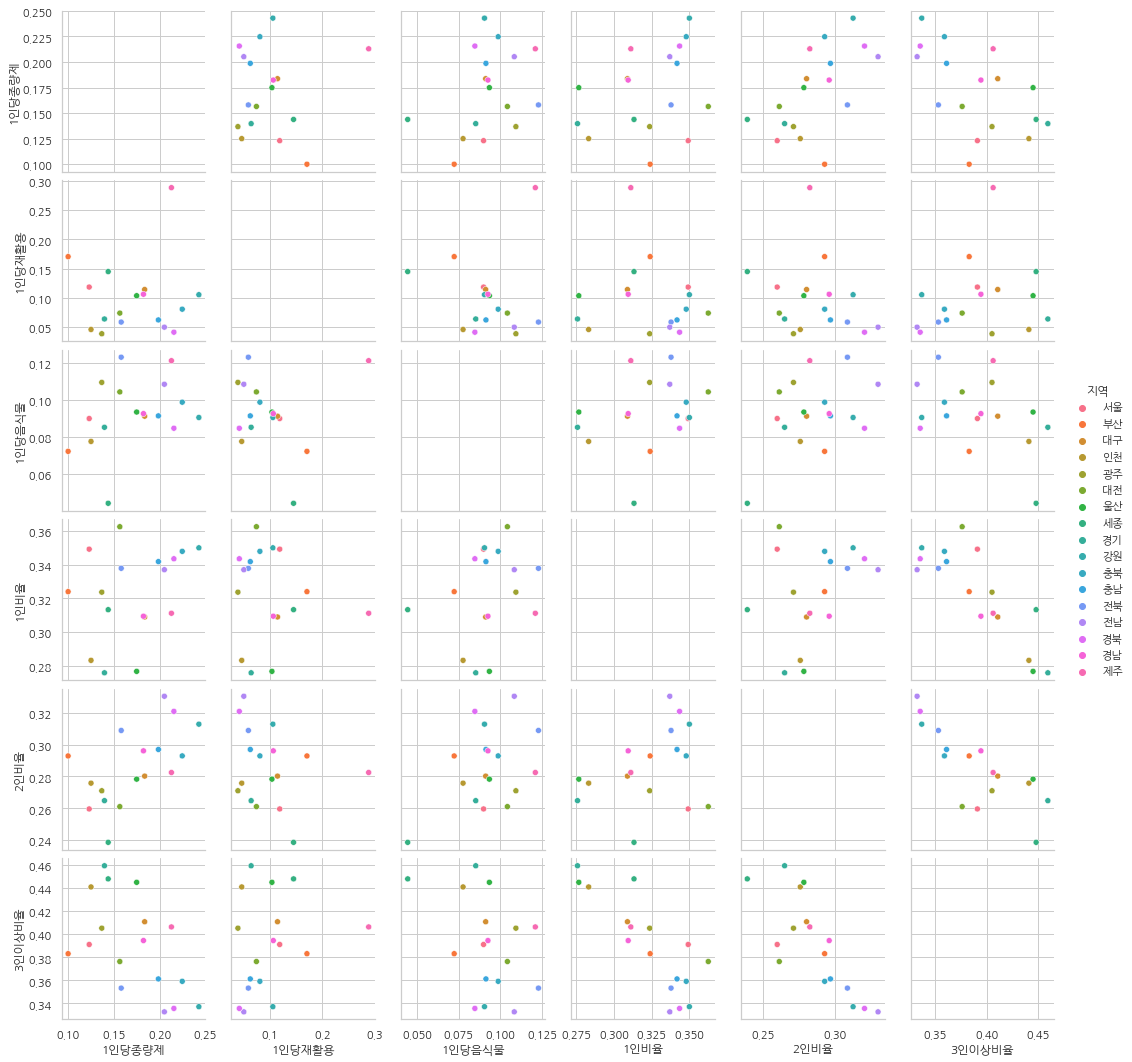

In [22]:
fig = plt.figure(figsize=(18,15), facecolor='white')
sns.pairplot(data_2020.iloc[:,[0,25,26,27,30,31,32]], hue='지역')
plt.show()

In [23]:
data_2020.iloc[:,[0,25,26,27,30,31,32]].corr()

,1인당종량제,1인당재활용,1인당음식물,1인비율,2인비율,3인이상비율
1인당종량제,1.000000,0.041474,0.342933,0.323214,0.594090,-0.554366
1인당재활용,0.041474,1.000000,-0.012128,-0.126460,-0.234898,0.218327
1인당음식물,0.342933,-0.012128,1.000000,0.254988,0.417492,-0.407611
1인비율,0.323214,-0.126460,0.254988,1.000000,0.323499,-0.835409
2인비율,0.594090,-0.234898,0.417492,0.323499,1.000000,-0.790329
3인이상비율,-0.554366,0.218327,-0.407611,-0.835409,-0.790329,1.000000


지역별 1인당 종량제 양은 2인가구 비율이 영향이 있다,,  
지역별 1인당 종량제 양은 3인이상가구 비율이 높은 지역일수록 적어지는 모습..입니다.

3인이상 가구의 경우 생활패턴, 같이 소비하는 부분이 많아서(예를 들어 대용량 구매를 한다던가,,)

#### 주거형태

In [24]:
# 필요한 컬럼만 추출
data_2019_housing = data_2019[["지역","1인당종량제","1인당재활용","1인당음식물","단독주택","아파트","연립주택","다세대주택","비거주용 건물내 주택","주택이외"]]
data_2020_housing = data_2020[["지역","1인당종량제","1인당재활용","1인당음식물","단독주택","아파트","연립주택","다세대주택","비거주용 건물내 주택","주택이외"]]
data_2019_housing.head()

,지역,1인당종량제,1인당재활용,1인당음식물,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,주택이외
0,서울,0.121720,0.108487,0.097627,315566,1720691,110968,777205,29534,224878
1,부산,0.093688,0.152431,0.073245,202101,831294,31073,171485,13804,69265
2,대구,0.178960,0.110795,0.095969,147565,579777,9438,52880,10680,20910
3,인천,0.114523,0.039365,0.082724,97302,648403,26309,238301,9050,78151
4,광주,0.140416,0.028862,0.114984,82695,419567,9383,8649,5867,14214


건물에 한 가구만 사는 단독주택과, 여러 가구가 모여 사는 공동주택으로 분류를 정리합니다.

In [25]:
data_2019_housing["공동주택"] = data_2019_housing["아파트"]+data_2019_housing["연립주택"] +data_2019_housing["다세대주택"]
data_2019_housing["기타주택"] = data_2019_housing["비거주용 건물내 주택"]+data_2019_housing["주택이외"]
data_2020_housing["공동주택"] = data_2020_housing["아파트"]+data_2020_housing["연립주택"] +data_2020_housing["다세대주택"]
data_2020_housing["기타주택"] = data_2020_housing["비거주용 건물내 주택"]+data_2020_housing["주택이외"]

In [26]:
del data_2019_housing["아파트"]
del data_2019_housing["연립주택"]
del data_2019_housing["다세대주택"]
del data_2019_housing["비거주용 건물내 주택"]
del data_2019_housing["주택이외"]

del data_2020_housing["아파트"]
del data_2020_housing["연립주택"]
del data_2020_housing["다세대주택"]
del data_2020_housing["비거주용 건물내 주택"]
del data_2020_housing["주택이외"]

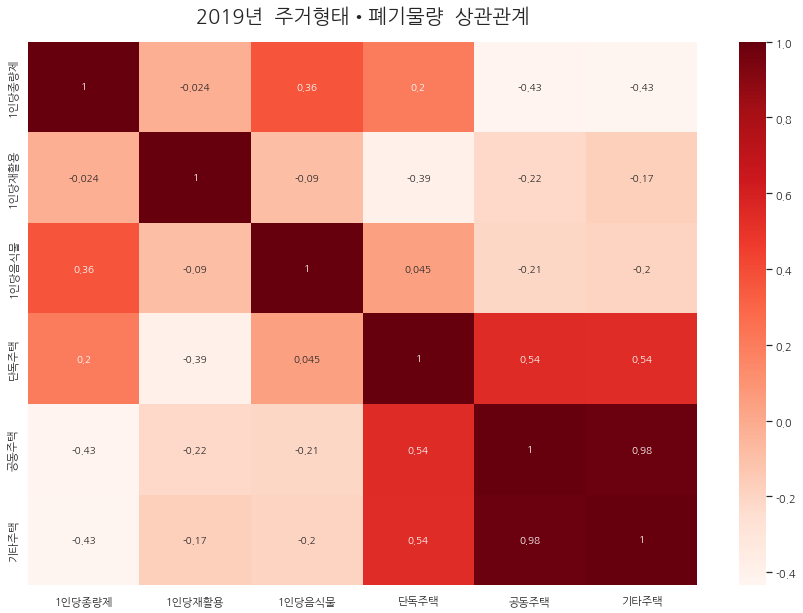

In [27]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2019년  주거형태•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(data_2019_housing.corr(),annot=True,cmap="Reds")

plt.show()

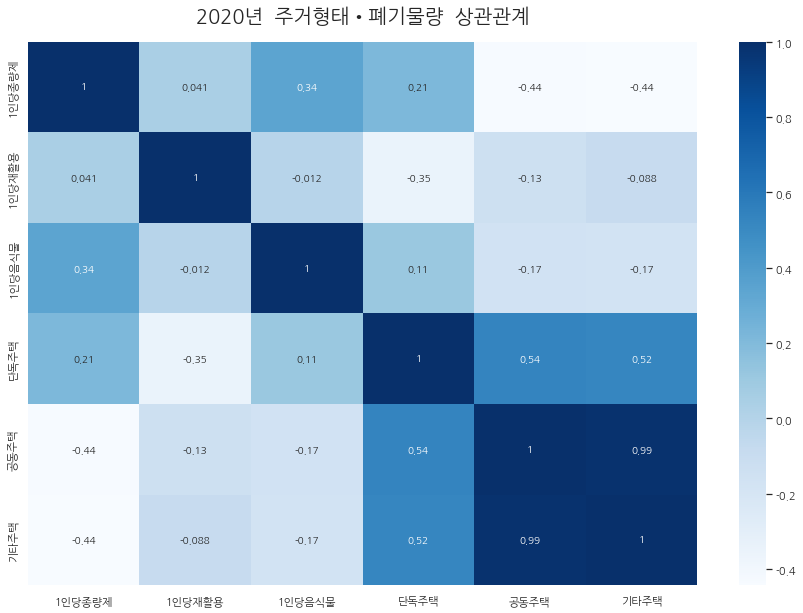

In [28]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2020년  주거형태•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(data_2020_housing.corr(),annot=True,cmap="Blues")

plt.show()

(다시정리)

> housing

1. 2019~2020 공동주택,기타주택의 경우 1인당종량제와 강하지 않은 음의 관계를 가진다.
1. 2019~2020 단독주택의 경우 1인당재활용과 강하지 않은 음의 관계를 가진다.
1. 위 두가지로 바라봤을때 가구들이 모여 사는경우 분리배출의 규칙때문에 재활용율이 높다는 예측을 할수 있다.

#### 연령

가구수와 마찬가지로 연령도 비율로 바꿔줍니다.

In [29]:
#연령대 비율 구하기
byage_19 = data_2019[['지역','20세 미만', '20대', '30대', '40대', '50대', '60세 이상','1인당종량제', '1인당재활용', '1인당음식물']]
byage_20 = data_2020[['지역','20세 미만', '20대', '30대', '40대', '50대', '60세 이상','1인당종량제', '1인당재활용', '1인당음식물']]
byage_19['total'] = byage_19['20세 미만']+ byage_19['20대'] + byage_19['30대'] +byage_19['40대'] +byage_19['50대'] + byage_19['60세 이상']
byage_20['total'] = byage_20['20세 미만']+ byage_20['20대'] + byage_20['30대'] +byage_20['40대'] +byage_20['50대'] + byage_20['60세 이상']
byage_19['20세 미만'] = byage_19['20세 미만']/byage_19['total'] *100
byage_19['20대'] = byage_19['20대']/byage_19['total'] *100
byage_19['30대'] = byage_19['30대']/byage_19['total'] *100
byage_19['40대'] = byage_19['40대']/byage_19['total'] *100
byage_19['50대'] = byage_19['50대']/byage_19['total'] *100
byage_19['60세 이상'] = byage_19['60세 이상']/byage_19['total'] *100
byage_20['20세 미만'] = byage_20['20세 미만']/byage_20['total'] *100
byage_20['20대'] = byage_20['20대']/byage_20['total'] *100
byage_20['30대'] = byage_20['30대']/byage_20['total'] *100
byage_20['40대'] = byage_20['40대']/byage_20['total'] *100
byage_20['50대'] = byage_20['50대']/byage_20['total'] *100
byage_20['60세 이상'] = byage_20['60세 이상']/byage_20['total'] *100

<Figure size 1080x720 with 0 Axes>

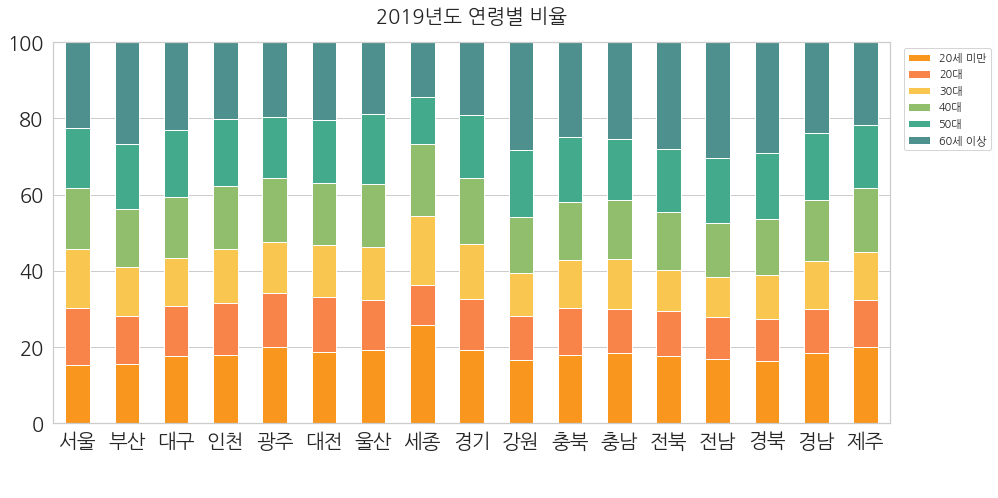

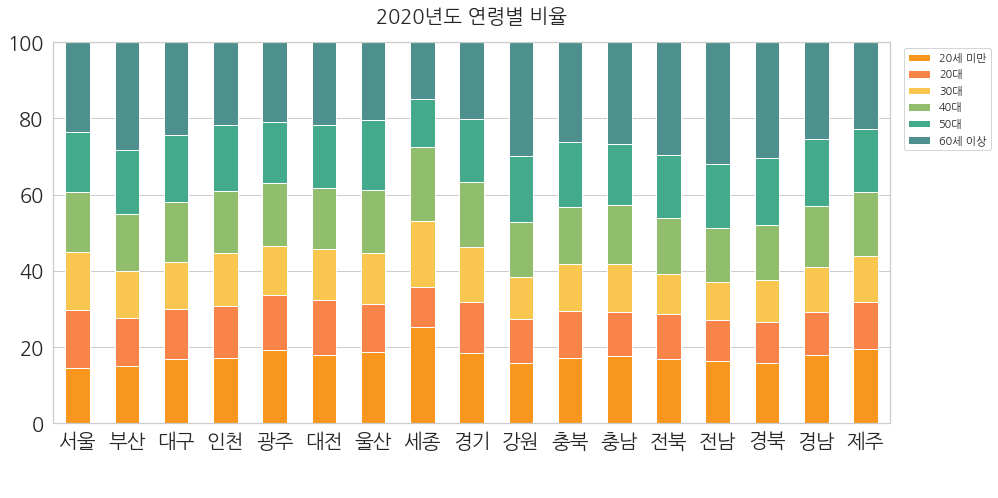

In [30]:
plt.figure(figsize=(15, 10), facecolor='White')

byage_19.iloc[:,[0,1,2,3,4,5,6]].plot.bar(x='지역', figsize=(15,7), stacked=True, color=('#f8961e','#f9844a','#f9c74f','#90be6d','#43aa8b','#4d908e','#577590'))
plt.title('2019년도 연령별 비율', fontsize=20, pad=20)
plt.ylim([0,100])
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1))

byage_20.iloc[:,[0,1,2,3,4,5,6]].plot.bar(x='지역', figsize=(15,7),stacked=True, color=('#f8961e','#f9844a','#f9c74f','#90be6d','#43aa8b','#4d908e','#577590'))
plt.title('2020년도 연령별 비율', fontsize=20, pad=20)
plt.ylim([0,100])
plt.xlabel(' ', rotation =0,fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1))

plt.show()

연령 비율과 생활폐기물량은 관계가 있는지 확인합니다.

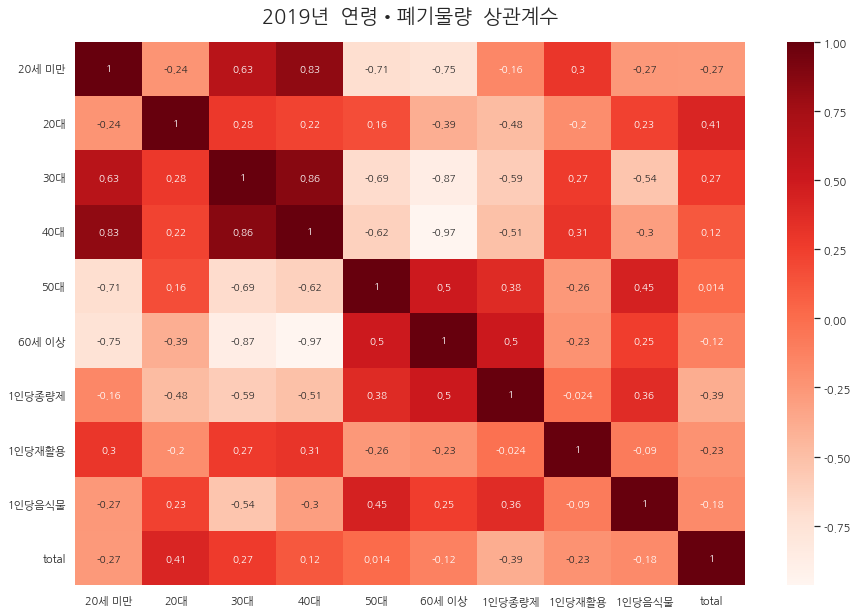

In [31]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2019년  연령•폐기물량  상관계수', fontsize=20, pad=20)
sns.heatmap(byage_19.corr(),annot=True,cmap="Reds")
plt.show()

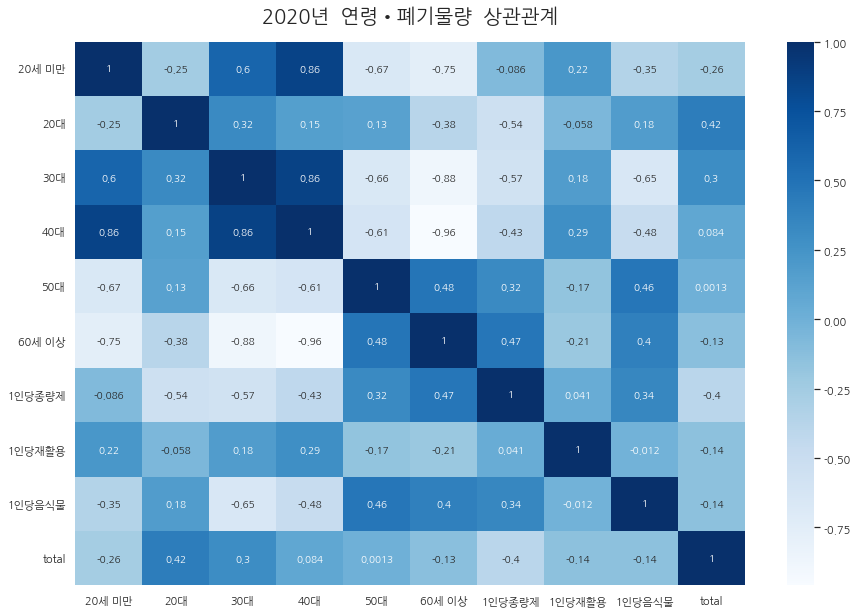

In [32]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2020년  연령•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(byage_20.corr(),annot=True,cmap="Blues")
plt.show()

2019년, 2020년 20-40대 연령 비율이 많을수록 인당종량제양이 적은 모습

(생각) 집밖에 있는 시간이 길어서 쓰레기양이 적다거나  
지역간 이동이 있는 인구를 고려하지 못한다거나  

경제활동을 하고 있는 주 연령층. 해당 연령 비율은 거주지 중심이기 때문에 쓰레기양이 적게 보이는 것 같다.

#### 임금과 근로시간

In [33]:
# 필요한 컬럼만 추출
df_2019_payment = data_2019[["지역","1인당종량제","1인당재활용","1인당음식물","급여액","근로시간"]]
df_2020_payment = data_2020[["지역","1인당종량제","1인당재활용","1인당음식물","급여액","근로시간"]]
df_2019_payment.head()

,지역,1인당종량제,1인당재활용,1인당음식물,급여액,근로시간
0,서울,0.121720,0.108487,0.097627,3704202.0,177.5
1,부산,0.093688,0.152431,0.073245,3050186.0,181.0
2,대구,0.178960,0.110795,0.095969,2908433.0,184.7
3,인천,0.114523,0.039365,0.082724,3121843.0,183.0
4,광주,0.140416,0.028862,0.114984,2942622.0,179.3


In [34]:
# 세종시 결측치 제거
# 2019 이전의 데이터도 없는 지역이니까,,
df_2019_payment = df_2019_payment.drop(7,axis=0)

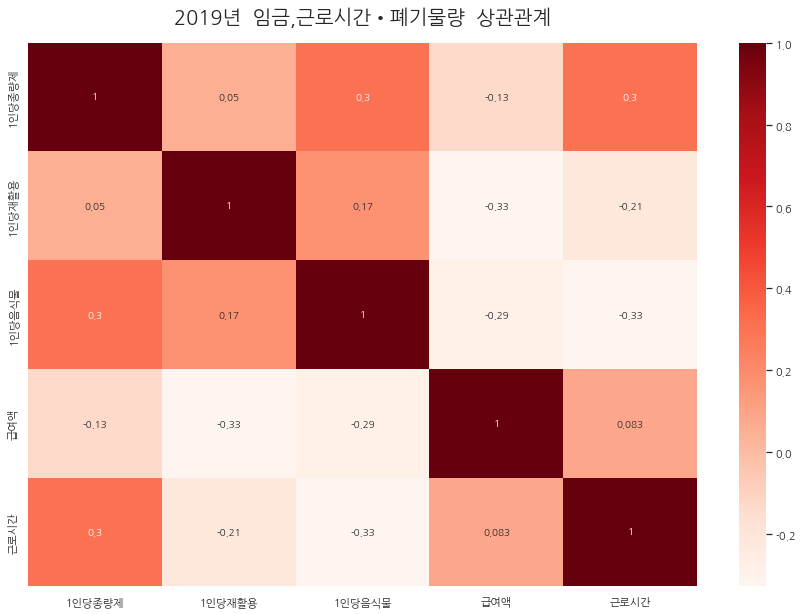

In [35]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2019년  임금,근로시간•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(df_2019_payment.corr(),annot=True,cmap="Reds")

plt.show()

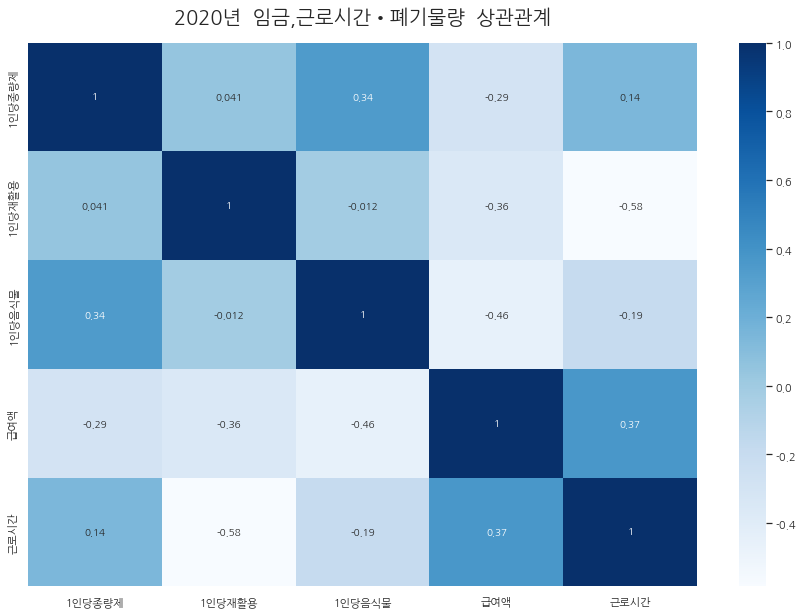

In [36]:
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2020년  임금,근로시간•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(df_2020_payment.corr(),annot=True,cmap="Blues")

plt.show()

각 변수간 상관관계가 있을까?

> payment

1. 2019년 평균급여액, 근로시간은 폐기물양과의 유의미한 차이가 없다
2. 2020년 근로시간이 1인당재활용폐기물은 음의 상관관계를 가진다
3. 2020년 급여액과 폐기물은 약한 음의 관계를 가지며 이는 수도권에 인구 대비 고소득 급여 특성으로 볼수 있다.

2020년 근로시간과 1인당 재활용 폐기물 배출량이 음의 상관관계
- 근로시간이 적은 지역일수록 1인당 재활용 폐기물 배출량이 많다?!

#### 폐기물 처리업체 수

폐기물량이 늘었으니까 처리업체도 늘지 않았을까?

In [37]:
# 필요한 컬럼만 추출
data_2019_subcontractor = data_2019[["지역","종량제","재활용","음식물","총폐기물량","업체수_19"]]
data_2020_subcontractor = data_2020[["지역","종량제","재활용","음식물","총폐기물량","업체수_20"]]

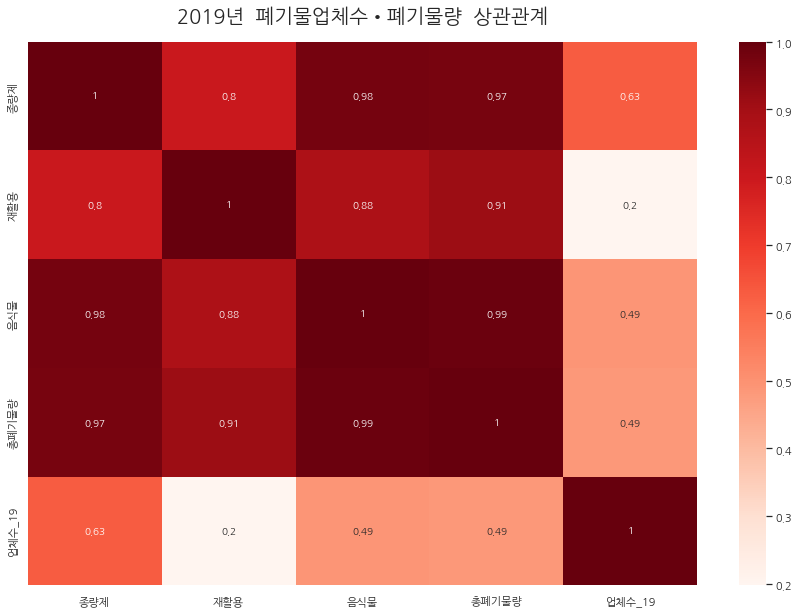

In [38]:
# 2019년도 지역별, 폐기물종류별, 폐기물업체 수 히트맵 도출
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2019년  폐기물업체수•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(data_2019_subcontractor.corr(),annot=True, cmap='Reds') 

plt.show()

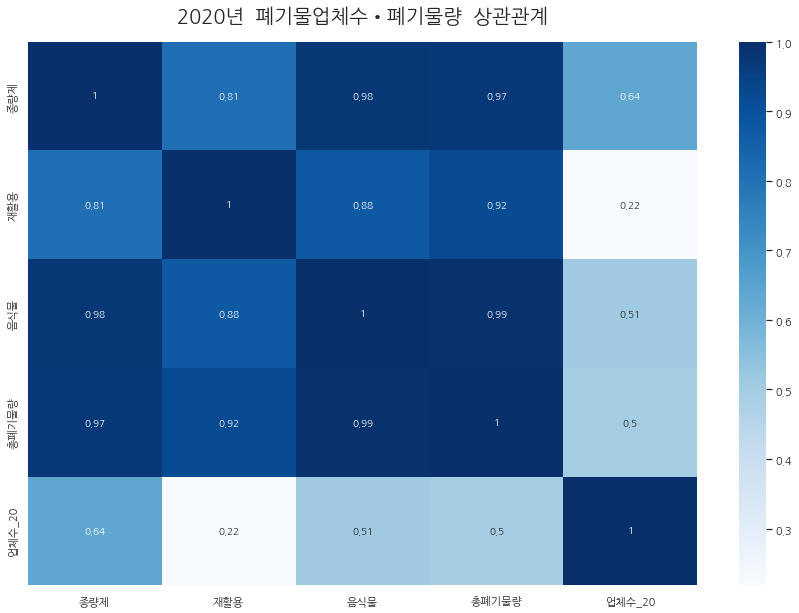

In [39]:
# 2020년도 지역별, 폐기물종류별, 폐기물업체 수 히트맵 도출
plt.figure(figsize=(15, 10), facecolor='White')
plt.title('2020년  폐기물업체수•폐기물량  상관관계', fontsize=20, pad=20)
sns.heatmap(data_2020_subcontractor.corr(),annot=True, cmap='Blues')

plt.show()

1. 2019년도와 2020년도 폐기물 업체수는 거의 변동 없으므로 2019년도 데이터 활용
2. 종량제배출량과 19년도 업체수 사이의 상관지수가 0.63 도출되나, 실제 백데이터 확인 결과 지역별 종량제배출량과 업체수의 관계성이 희미함
3. 폐기물처리시설은 “폐기물 처분시설 또는 재활용시설의 설치기준(「폐기물관리법 시행규칙」)”에 맞게 설치하되, 
시간당 폐기물 소각 능력이 25킬로그램 미만인 폐기물 소각 시설은설치·운영 불가능. <출처 : 자원순환정보시스템>

-> 해당 사유에 의거하여, 토지 이용에 있어 주거&상권지역이 대부분을 차지하고 있는 서울, 광역시는 생활폐기물시설의 추가설치가 거의 불가능.
-> 폐기물량과 관계 없이 큰 처리시설을 건설할 수 있는 지방권 중심으로 많은 수의 폐기물 업체가 분포

쓰레기가 많은 지역이라서 업체 수가 많은게 아니라, 시설적, 지역적 특성이 있다.

#### 주요관광지 입장객 수

In [40]:
# 2019년 데이터에서 필요 컬럼만 추출
data_2019_visitor = data_2019[['지역','종량제','재활용','음식물','총폐기물량','입장객수_19']].set_index('지역')
data_2019_visitor.head()

,종량제,재활용,음식물,총폐기물량,입장객수_19
지역,,,,,
서울,1173329.0,1045761.5,941079.5,3160170.0,28172637
부산,315980.5,514102.5,247032.0,1077115.0,28172637
대구,434861.0,269224.0,233198.5,937283.5,14235894
인천,338099.5,116216.0,244221.5,698537.0,7586854
광주,209181.5,42997.0,171294.5,423473.0,6268660


In [41]:
# 데이터의 상관관계 파악
data_2019_visitor.corr()

,종량제,재활용,음식물,총폐기물량,입장객수_19
종량제,1.000000,0.803811,0.976029,0.974334,0.645803
재활용,0.803811,1.000000,0.876350,0.914028,0.312581
음식물,0.976029,0.876350,1.000000,0.992272,0.523754
총폐기물량,0.974334,0.914028,0.992272,1.000000,0.536332
입장객수_19,0.645803,0.312581,0.523754,0.536332,1.000000


폐기물량과 입장객수는 양의 상관관계가 있습니다.  
폐기물 분류 중에서도 가장 강한 상관관계를 띄는 폐기물-종량제 양과 입장객수 관계를 확인하겠습니다.

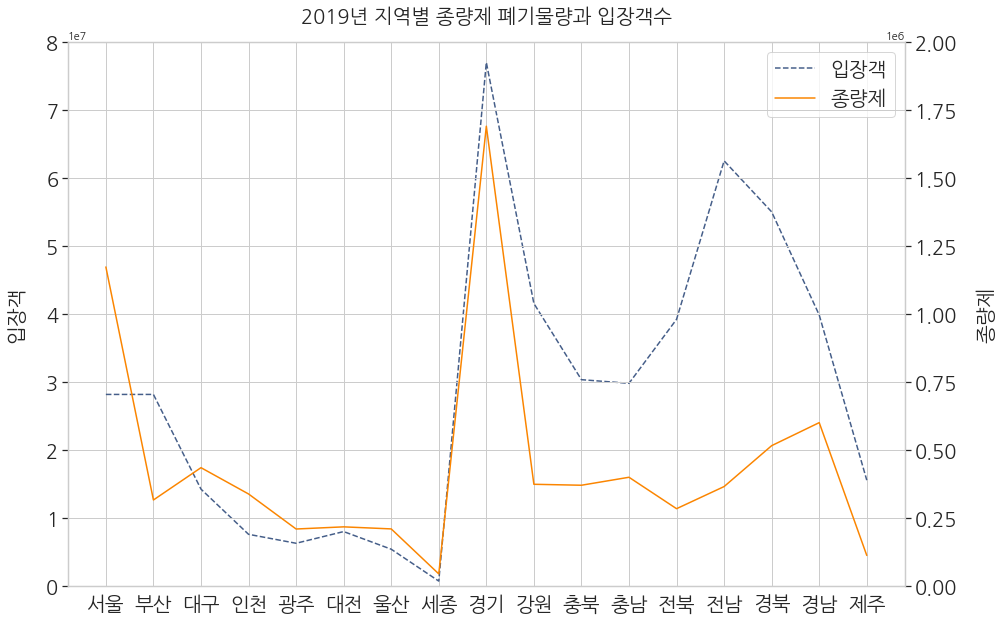

In [42]:
# x 기준이 되는 지역
# y1, y2 지역별 비교하고자 하는 변수
x=data_2019_visitor.index
y1=data_2019_visitor['입장객수_19']
y2=data_2019_visitor['종량제']

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax1 = plt.subplots()

# y1에 대한 설정
line1 = ax1.plot(x, y1, color='#455E89', label='입장객', linestyle = '--')
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
ax1.set_ylim(0,80000000)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel('입장객',fontsize=20, labelpad=20)

# y1과 x축을 공유하는 y2에 대한 설정
ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#FB8500', label='종량제')
plt.yticks(rotation =0, fontsize=20)
ax2.set_ylabel('종량제',fontsize=20, labelpad=20)
ax2.set_ylim(0,2000000)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'size': 20})

plt.title('2019년 지역별 종량제 폐기물량과 입장객수', fontsize=20, pad=20)
plt.show()

In [43]:
# 2020년 데이터 진행
data_2020_visitor = data_2020[['지역','종량제','재활용','음식물','총폐기물량','입장객수_20']].set_index('지역')

In [44]:
# 데이터의 상관관계 파악
data_2020_visitor.corr()

,종량제,재활용,음식물,총폐기물량,입장객수_20
종량제,1.000000,0.810651,0.977618,0.974176,0.380801
재활용,0.810651,1.000000,0.877363,0.919378,0.309636
음식물,0.977618,0.877363,1.000000,0.991188,0.318159
총폐기물량,0.974176,0.919378,0.991188,1.000000,0.355611
입장객수_20,0.380801,0.309636,0.318159,0.355611,1.000000


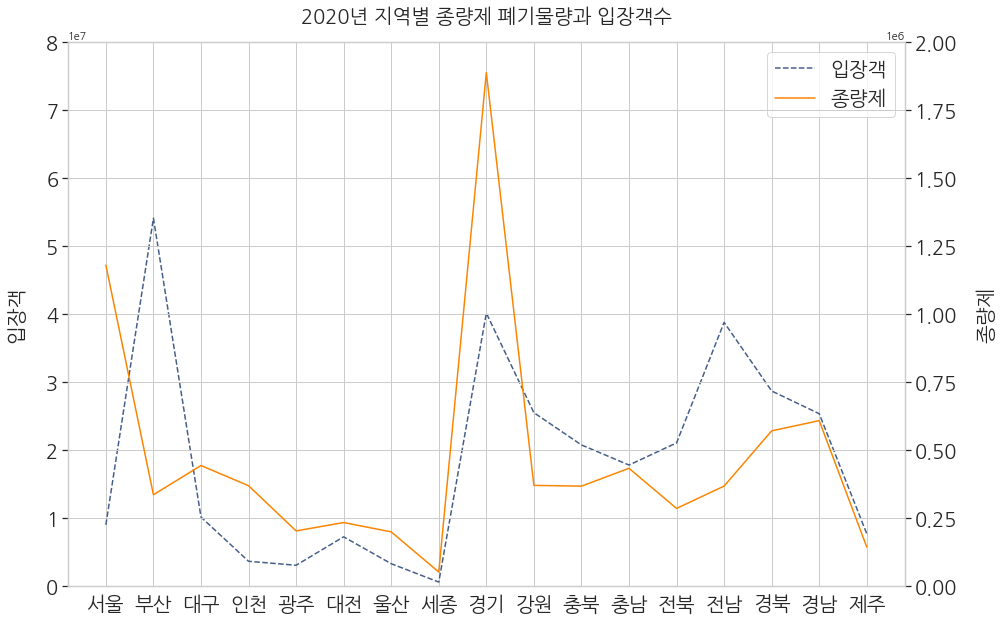

In [45]:
x=data_2020_visitor.index
y1=data_2020_visitor['입장객수_20']
y2=data_2020_visitor['종량제']

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax1 = plt.subplots()

# y1에 대한 설정
line1 = ax1.plot(x, y1, color='#455E89', label='입장객', linestyle = '--')
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=20)
ax1.set_ylim(0,80000000)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel('입장객',fontsize=20, labelpad=20)

# y1과 x축을 공유하는 y2에 대한 설정
ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#FB8500', label='종량제')
plt.yticks(rotation =0, fontsize=20)
ax2.set_ylabel('종량제',fontsize=20, labelpad=20)
ax2.set_ylim(0,2000000)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'size': 20})

plt.title('2020년 지역별 종량제 폐기물량과 입장객수', fontsize=20, pad=20)
plt.show()

주요관광지 입장객 수가 폐기물량 양에 영향이 있다.  
데이터 상으로관광지 입장객 수는 줄었는데 종량제 양은 늘었으니 이것만으로는 설명할 수 없다,,

#### 상권 수

In [46]:
# 필요한 컬럼만 추출
data_2020_market = data_2020[["지역","종량제","재활용","음식물","상권수"]]
data_2020_market.head()

,지역,종량제,재활용,음식물,상권수
0,서울,1180049.4,1135338.5,862232.1,254
1,부산,335144.3,571235.6,242014.3,102
2,대구,442825.6,275334.8,219889.4,48
3,인천,368460.1,134786.1,228604.5,59
4,광주,202193.3,56822.2,161643.9,43


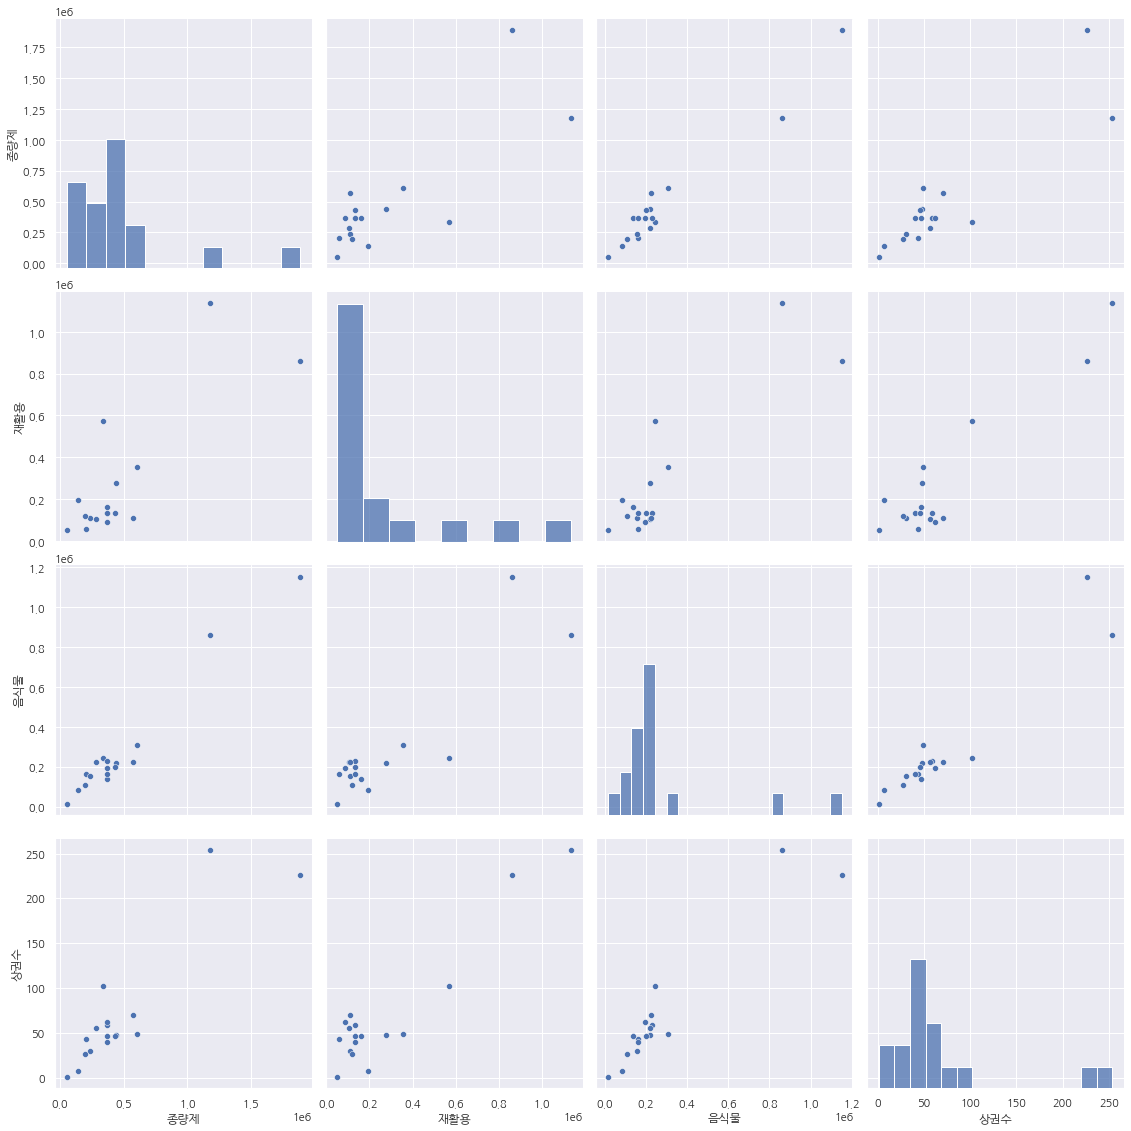

In [47]:
plt.style.use('dark_background') 
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.pairplot(data_2020_market, height=4) # 2020년도 지역별, 폐기물종류별, 상권수 상관관계분포도 도출

상권수가 많은 지역의 폐기물량이 많은 것을 확인할 수 있습니다.  
그래서 분류별 폐기물량과 상권수의 혼합 그래프를 그려보았습니다.

<Figure size 1080x720 with 0 Axes>

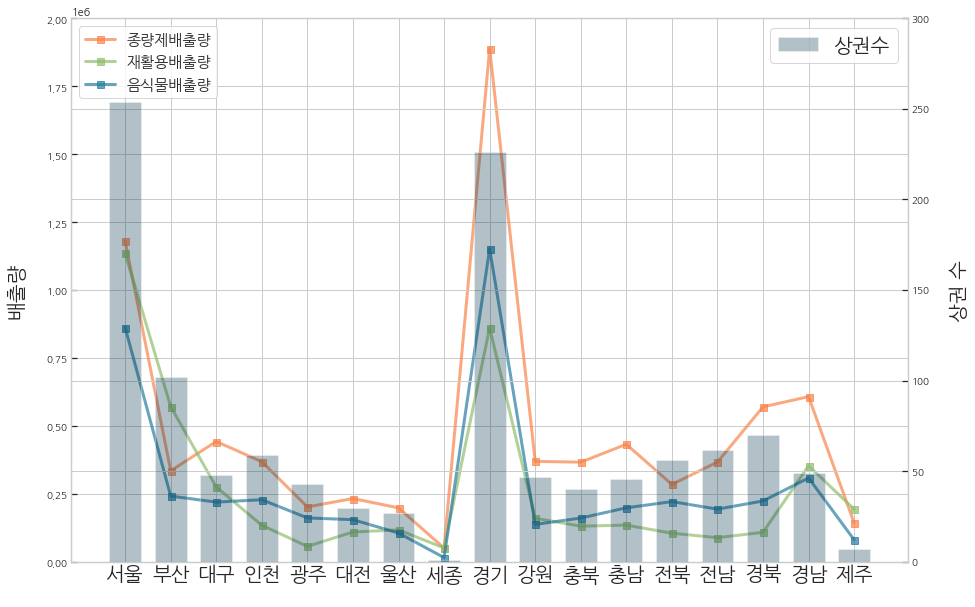

In [48]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')
%matplotlib inline

plt.figure(figsize=(15, 10), facecolor='White')

x=data_2020_market['지역']
y1=data_2020_market['종량제']
y2=data_2020_market['상권수']
y3=data_2020_market['재활용']
y4=data_2020_market['음식물']

fig,ax1 = plt.subplots(figsize=(15,10))

ax1.plot(x, y1, '-s', color='#F9844A', markersize=7, linewidth=3, alpha=0.7, label='종량제배출량')
ax1.set_ylim(0, 2000000)
ax1.set_xlabel(' ')
ax1.set_ylabel('배출량',fontsize=20, labelpad=20)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=10)
ax1.tick_params(axis='both', direction='in')

ax1.plot(x, y3, '-s', color='#90be6d', markersize=7, linewidth=3, alpha=0.7, label='재활용배출량')
ax1.set_xlabel(' ')
plt.xticks(rotation =0, fontsize=20)
ax1.tick_params(axis='both', direction='in')

ax1.plot(x, y4, '-s', color='#277da1', markersize=7, linewidth=3, alpha=0.7, label='음식물배출량')
ax1.set_xlabel(' ')
plt.xticks(rotation =0, fontsize=20)
ax1.tick_params(axis='both', direction='in')
ax1.legend(loc='upper left', prop={'size': 15})

ax2 = ax1.twinx()
ax2.bar(x, y2, color='#003049', label='상권수', alpha=0.3, width=0.7)
ax2.set_ylim(0, 300)
plt.xticks(rotation =0, fontsize=20)
plt.yticks(rotation =0, fontsize=10)
ax2.set_ylabel('상권 수',fontsize=20, labelpad=20)
ax2.tick_params(axis='y', direction='in')
ax2.legend(loc='upper right', prop={'size': 20})

plt.show()

상권수와 종량제 배출량 관계가 있어 보인다.

눈에 보이는 점  
상권수 서울 > 경기  
배출량 서울 < 경기

## 결과 요약

처음 알고자 했던 것은 이렇습니다.

> 쓰레기가 많은 지역이면 처리하는 업체도 많지 않을까?  
> 1인가구가 많은 지역이면 쓰레기도 더 많을거야

알게 된 것은 이렇습니다.

> 쓰레기가 많은 지역이면 처리하는 업체도 많지 않을까?  
> 1인가구가 많은 지역이면 쓰레기도 더 많을거야